In [7]:
x = np.random.sample((100,3))
dataset = tf.data.Dataset.from_tensor_slices(x)

In [ ]:
pip install tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('mnist', split='train', shuffle_files=True)

In [ ]:
pip install scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

In [3]:
cars

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


<AxesSubplot:ylabel='output'>

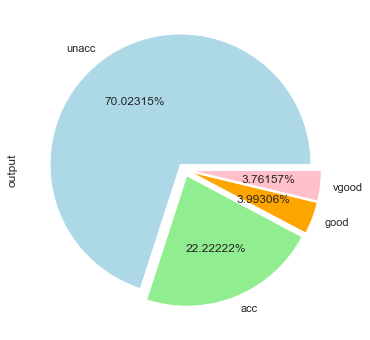

In [5]:
plot_size = plt.rcParams['figure.figsize']
plot_size[0] = 8
plot_size[1] = 6

plt.rcParams['figure.figsize'] = plot_size
cars.output.value_counts().plot(kind = 'pie', autopct = '%0.05f%%',\
                                colors = ['lightblue', 'lightgreen', 'orange', 'pink'],\
                                explode = (0.05, 0.05, 0.05, 0.05))

In [17]:
price = pd.get_dummies(cars.price, prefix = 'price')
maint = pd.get_dummies(cars.maint, prefix = 'maint')
doors = pd.get_dummies(cars.doors, prefix = 'doors')
persons = pd.get_dummies(cars.persons, prefix = 'persons')
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix = 'lug_capacity')
safety = pd.get_dummies(cars.safety, prefix = 'safety')
labels = pd.get_dummies(cars.output, prefix = 'condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis = 1)
y = labels.values

In [24]:
X

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_capacity_big,lug_capacity_med,lug_capacity_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [22]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 2s 8ms/step - loss: 1.0971 - acc: 0.6109 - val_loss: 0.9058 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 1s 4ms/step - loss: 0.6715 - acc: 0.7195 - val_loss: 0.7058 - val_acc: 0.6643
Epoch 3/50
139/139 [==============================] - 0s 3ms/step - loss: 0.5010 - acc: 0.7873 - val_loss: 0.5845 - val_acc: 0.7617
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4074 - acc: 0.8452 - val_loss: 0.5150 - val_acc: 0.8014
Epoch 5/50
139/139 [==============================] - 0s 3ms/step - loss: 0.3551 - acc: 0.8606 - val_loss: 0.4604 - val_acc: 0.8375
Epoch 6/50
139/139 [==============================] - 1s 4ms/step - loss: 0.3162 - acc: 0.8787 - val_loss: 0.4184 - val_acc: 0.8592
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2863 - acc: 0.8869 - val_loss: 0.3823 - val_acc: 0.8628
Epoch 8/50
139/139 [==============================] - 1s 7ms/step - loss: 0.

In [26]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.0803 - acc: 0.9740
Test Score :  0.08034934848546982
Test Accuracy :  0.97398841381073


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [27]:
# K-최근접 이웃 법

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('iris.data', names=names)

In [28]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [43]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()         # mean = 0, Std = 1이 되도록 반환하는 작업.

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [45]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 0.8333333333333334


In [52]:
k = 10

acc_array = np.zeros(k)

for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
    
max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)

print('Accuracy', max_acc, 'optimal k = ', k+1)

Accuracy 1.0 optimal k =  9


In [125]:
# SVM

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.svm import SVC
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [126]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data,
                                                                   iris.target,
                                                                   test_size = .6,
                                                                   random_state = 42)

In [127]:
svm = svm.SVC(kernel = 'linear', C=1, gamma = 10)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy : {0:f}'.format(score))

Accuracy : 0.988889


In [1]:
# 의사결정나무

import pandas as pd
df = pd.read_csv('train.csv',index_col='PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [2]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch' , 'Fare', 'Survived']]
df['Sex'] = df['Sex'].replace({'male' : 0, 'female' : 1})
df = df.dropna()
X = df.drop('Survived', axis = 1)
y = df['Survived']

<ipython-input-2-f816486becb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].replace({'male' : 0, 'female' : 1})


In [3]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250,0
887,2,0,27.0,0,0,13.0000,0
888,1,1,19.0,0,0,30.0000,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
X_train.shape

(535, 6)

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8324022346368715

In [9]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=['Pred not survived', 'Pred survived'],
            index = ['True not survived', 'True survived'])

,Pred not survived,Pred survived
True not survived,99,13
True survived,17,50


In [10]:
# 로지스틱 회귀분석

%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data shape", digits.data.shape)
print('Label Data shape', digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


In [23]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

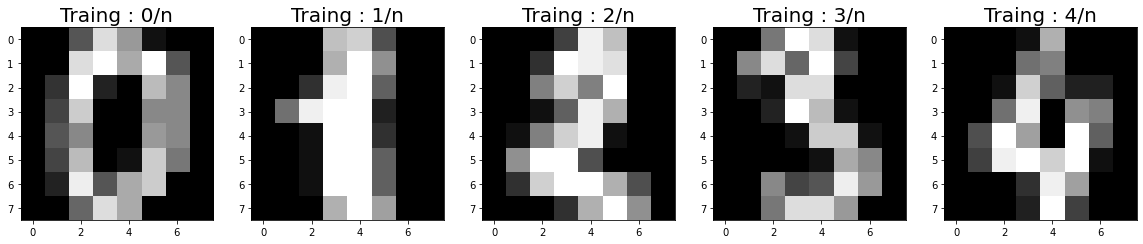

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Traing : %i/n' %label, fontsize = 20)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/Users/jeong-giho/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
y_pred = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9511111111111111


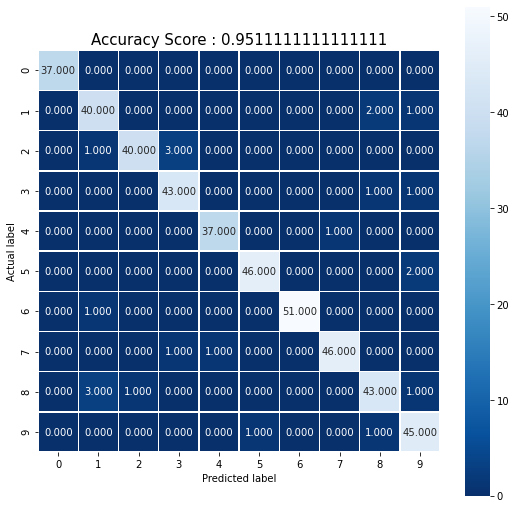

In [21]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [25]:
# 지도학습 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
dataset = pd.read_csv('dataset/weather.csv')
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


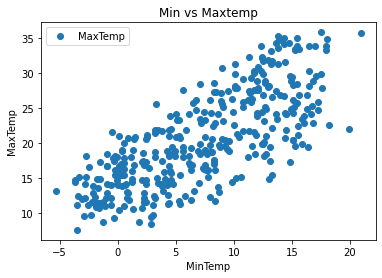

In [27]:
dataset.plot(x='MinTemp', y='MaxTemp', style = 'o')
plt.title("Min vs Maxtemp")
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [28]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual" : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,34.1,26.362884
1,15.5,14.394203
2,31.2,22.797745
3,20.2,24.919852
4,28.4,27.296611
...,...,...
69,21.0,18.723301
70,13.9,14.563972
71,15.5,18.808185
72,28.4,20.251217


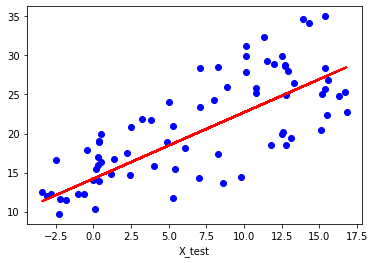

In [33]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth = 2)
plt.xlabel("X_test")
plt.show()

In [31]:
print("MSE : ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE :  19.90115544850286
RMSE :  4.46107111000294
